# Assignment 03

Author: Laura Donnelly

Create a notebook called assignment03-pie.ipynb

The note book should have a nice pie chart of peoples email domains in the csv file at the url

https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download

This csv file has 1000 people. You may download the data or link to it.

Marks will be given for:

Just creating the pie chart

Making it look nice

As always your code should be well laid out.

Import necessary libraries. 

Documentation can be found here [Pandas Doc](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv), [Numpy Doc](https://numpy.org/doc/2.3/index.html) and [Matplotlib.pyplot Doc](https://matplotlib.org/stable/api/pyplot_summary.html)

Using plt.style.use to set the style for matplotlib plots.
Documentation for styles can be found here: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set up display options for plots.
plt.style.use("seaborn-v0_8-pastel")


# Read in the CSV file from the URL.

url = "https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download"

# Read the data into a pandas DataFrame
df = pd.read_csv(url)

# Display the first few rows to verify the data loaded correctly
df.head()


,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
0,1,8717bbf45cCDbEe,Shelia,Mahoney,Male,pwarner@example.org,857.139.8239,2014-01-27,Probation officer
1,2,3d5AD30A4cD38ed,Jo,Rivers,Female,fergusonkatherine@example.net,+1-950-759-8687,1931-07-26,Dancer
2,3,810Ce0F276Badec,Sheryl,Lowery,Female,fhoward@example.org,(599)782-0605,2013-11-25,Copy
3,4,BF2a889C00f0cE1,Whitney,Hooper,Male,zjohnston@example.com,+1-939-130-6258,2012-11-17,Counselling psychologist
4,5,9afFEafAe1CBBB9,Lindsey,Rice,Female,elin@example.net,(390)417-1635x3010,1923-04-15,Biomedical engineer


df["email"].str.split("@") splits each email into a list like ["name", "domain.com"].

.str[1] grabs the second part — the domain.

See : https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html

In [ ]:
# Extract domain from email addresses in the 'Email' column.
df["domain"] = df["Email"].str.split("@").str[1]

# Check the new column to ensure domains were pulled correctly.
df[["Email", "domain"]].head()

,Email,domain
0,pwarner@example.org,example.org
1,fergusonkatherine@example.net,example.net
2,fhoward@example.org,example.org
3,zjohnston@example.com,example.com
4,elin@example.net,example.net


Count how many people belong to each email domain

See : https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html

In [ ]:
# Count how many people belong to each email domain and set it to a variable to call later.
domain_counts = df["domain"].value_counts()

# Display top 10 domains to get an idea of the data distribution.
domain_counts.head(10)

domain
example.org    341
example.com    339
example.net    320
Name: count, dtype: int64

Create a nice pretty pie chart. Use 8,8 for a good size figure. 

See https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

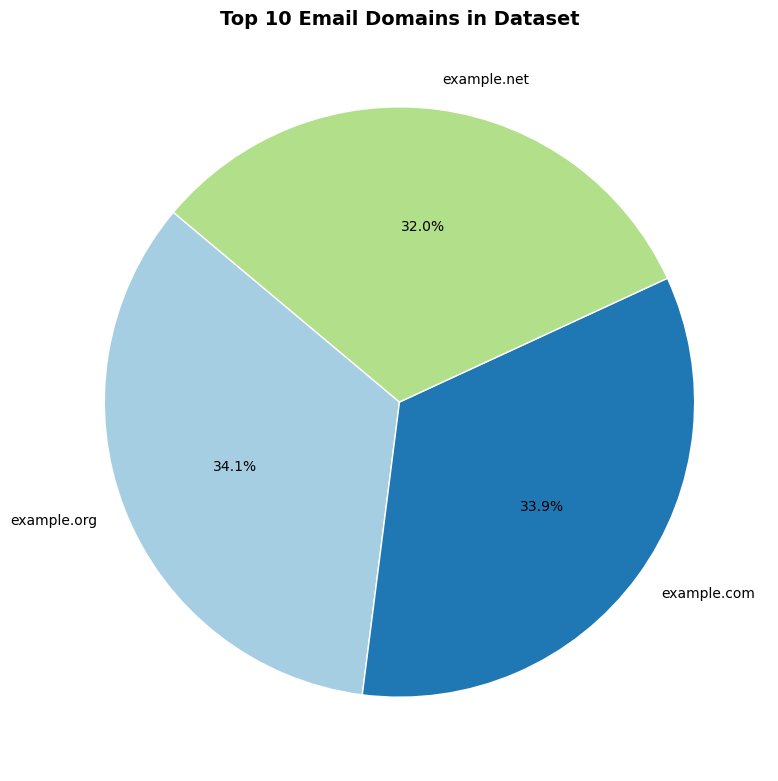

In [11]:
# create pie chart. 
plt.figure(figsize=(8, 8))
plt.pie(
    domain_counts.head(10),                # Top 10 email domains
    labels=domain_counts.head(10).index,   # Domain names as labels
    autopct="%1.1f%%",                     # Show percentages
    startangle=140,                        # Rotate chart for aesthetics
    colors=plt.cm.Paired(np.arange(10)),   # Use a nice colormap
    wedgeprops={"edgecolor": "white"}      # Add white border around slices
)

plt.title("Top 10 Email Domains in Dataset", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()